<a href="https://colab.research.google.com/github/rahayuisna23/data_analytics_portofolio/blob/main/Statistical_Analysis_on_Factors_Influencing_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistical Analysis on Factors Influencing Life Expectancy**

Tujuan dari analisis ini adalah untuk memprediksi angka harapan hidup dari 193 negara di dunia berdasarkan data dari 22 variabel meliputi faktor kesehatan, ekonomi, dan sosial dengan menggunakan analisis regresi. Dua metode yang digunakan adalah Decision Tree dan Random Forest. Dari hasil analisis ini, diharapkan dapat digunakan pemerintah terkait untuk memajukan sektor kesehatan dan sosial sehingga dapat terwujud masyarakat yang sejahtera.

Data yang digunakan terdiri dari 2938 observasi dan 22 variabel. Variabel-variabel yang digunakan adalah sebagai berikut:

*   Country : Negara
*   Year : Tahun
*   Status : Status negara meliputi developing atau developed
*   Life expectancy : Angka Harapan Hidup
*   Adult Mortality : Angka Kematian Dewasa dari kedua jenis kelamin (probabilitas kematian antara 15 dan 60 tahun per 1000 penduduk)
*   Infant deaths : Jumlah Kematian Bayi per 1000 penduduk
*   Alcohol : Alkohol, tercatat konsumsi per kapita (15+) (dalam liter alkohol murni)
*   Percentage Expenditure : Pengeluaran untuk kesehatan sebagai persentase dari Produk Domestik Bruto per kapita (%)
*   Hepatitis B : Cakupan imunisasi Hepatitis B (HepB) pada anak usia 1 tahun (%)
*   Measles : jumlah kasus campak yang dilaporkan per 1000 penduduk
*   BMI : Rata-rata Indeks Massa Tubuh dari seluruh populasi
*   Under-five deaths : Jumlah kematian balita per 1000 penduduk
*   Total expenditure : Pengeluaran pemerintah umum untuk kesehatan sebagai persentase dari total pengeluaran pemerintah (%)
*   Diphtheria : Cakupan imunisasi difteri tetanus toksoid dan pertusis (DTP3) pada anak usia 1 tahun (%)
*   HIV/AIDS : Kematian per 1.000 kelahiran hidup HIV/AIDS (0-4 tahun)
*   GDP : Produk Domestik Bruto per kapita (dalam USD)
*   Population : Populasi negara
*   Thinness 1-19 years : Prevalensi ketipisan pada anak-anak dan remaja untuk usia 10 sampai 19 tahun (%)
*   Thinness 5-9 years : Prevalensi ketipisan pada anak-anak untuk Usia 5 sampai 9 (%)
*   Income composition of resources : Indeks Pembangunan Manusia dalam hal komposisi pendapatan sumber daya (indeks berkisar dari 0 hingga 1)
*   Schooling : Jumlah tahun Sekolah (tahun)








# Data Importing

In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
life=pd.read_csv('/content/Life Expectancy Data.csv')

In [5]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

In [6]:
life.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

dilakukan pengecekan mengenai ada atau tidaknya missing value pada dataset, diperoleh bahwa terdapa missing value pada dataset

In [9]:
# Handle missing value
life["Life expectancy "].fillna(
    value = life["Life expectancy "].mean(),
    inplace = True
)

life["Adult Mortality"].fillna(
    value = life["Adult Mortality"].mean(),
    inplace = True
)

life["Alcohol"].fillna(
    value = life["Alcohol"].mean(),
    inplace = True
)

life["Hepatitis B"].fillna(
    value = life["Alcohol"].mean(),
    inplace = True
)

life[" BMI "].fillna(
    value = life[" BMI "].mean(),
    inplace = True
)

life["Polio"].fillna(
    value = life["Polio"].mean(),
    inplace = True
)

life["Total expenditure"].fillna(
    value = life["Total expenditure"].mean(),
    inplace = True
)

life["Diphtheria "].fillna(
    value = life["Diphtheria "].mean(),
    inplace = True
)

life["GDP"].fillna(
    value = life["GDP"].mean(),
    inplace = True
)

life["Population"].fillna(
    value = life["Population"].mean(),
    inplace = True
)

life[" thinness  1-19 years"].fillna(
    value = life[" thinness  1-19 years"].mean(),
    inplace = True
)

life[" thinness 5-9 years"].fillna(
    value = life[" thinness 5-9 years"].mean(),
    inplace = True
)

life["Income composition of resources"].fillna(
    value = life["Income composition of resources"].mean(),
    inplace = True
)

life["Schooling"].fillna(
    value = life["Schooling"].mean(),
    inplace = True
)

Dalam menangani banyaknya missing value dapat digunakan imputasi atau pengisian pada nilai
yang hilang dengan nilai mean

In [10]:
life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
#mengubah tipe data Year menjadi object
life['Year']=[str(i) for i in life['Year']]

In [12]:
life.dtypes

Country                             object
Year                                object
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [13]:
life['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [14]:
life['Year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [15]:
life['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [16]:
life_dmy=pd.get_dummies(life)
life_dmy.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,1,0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,1,0,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,1,0,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
life_dmy=life_dmy.drop(['Country_Afghanistan','Status_Developing','Year_2000'],axis=1)
life_dmy

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
life_dmy.to_csv('life Preprocessed.csv',index=False)

In [19]:
life_dmy=pd.read_csv('/content/life Preprocessed.csv')

In [20]:
X_life=life_dmy.drop(['Life expectancy '],axis=1)
Y_life=life_dmy['Life expectancy ']

In [21]:
#Untuk Data Regresi (life)
X_trainr,X_testr,Y_trainr,Y_testr=train_test_split(X_life,Y_life,test_size=0.3)

In [22]:
print(X_trainr.shape)
print(X_testr.shape)
print(Y_trainr.shape)
print(Y_testr.shape)

(2056, 226)
(882, 226)
(2056,)
(882,)


Dalam splitting menjadi data latih dan data uji dengan proporsi data uji sebesar 30% dari total observasi dan sisanya proporsi data latih. Berdasarkan pengujian didapatkan sebanyak 2056 observasi dari 226 variabel independen untuk data latih, dan didapatkan sebanyak 882 observasi dari 226 variabel independen untuk data uji. Selain itu juga didapatkan sebanyak 2056 observasi
dari variabel dependen untuk data latih dan sebanyak 882 observasi dari variabel dependen untuk data uji.

In [ ]:
np.random.seed(123)

# Modelling

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
clf1=DecisionTreeRegressor(criterion='squared_error') #MSE
clf1.fit(X_trainr,Y_trainr)

DecisionTreeRegressor()

In [25]:
Y_pred=clf1.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 7.437460929276818
MAE: 1.6717969747097385


Diperoleh nilai MSE sebesar 7,44 dan nilai MAE sebesar 1,67 sehingga dapat dikatakan bahwa performa model regresi menggunakan algoritma decision tree pada dataset cukup baik.

Feature: 0, Score: 0.13853
Feature: 1, Score: 0.00303
Feature: 2, Score: 0.00379
Feature: 3, Score: 0.00636
Feature: 4, Score: 0.00169
Feature: 5, Score: 0.00258
Feature: 6, Score: 0.00334
Feature: 7, Score: 0.02485
Feature: 8, Score: 0.00364
Feature: 9, Score: 0.00311
Feature: 10, Score: 0.00384
Feature: 11, Score: 0.60165
Feature: 12, Score: 0.00212
Feature: 13, Score: 0.00276
Feature: 14, Score: 0.00466
Feature: 15, Score: 0.01504
Feature: 16, Score: 0.15323
Feature: 17, Score: 0.01310
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00020
Feature: 26, Score: 0.00015
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

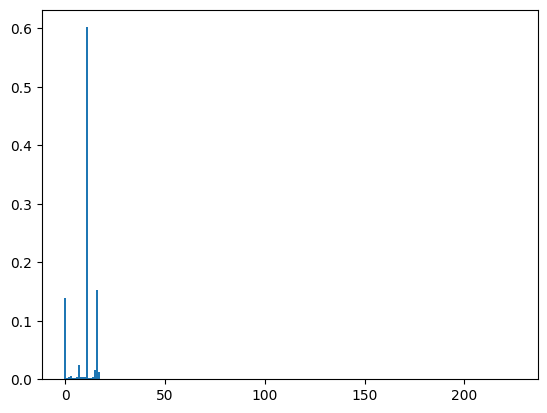

In [26]:
# get importance
importance = clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Terlihat bahwa variabel pada Feature atau kolom dengan
nomor 0 dan 11 merupakan variabel yang memiliki nilai variabel importance tertinggi. Artinya kedua variabel tersebut merupakan variabel yang memiliki pengaruh paling signifikan terhadap model.

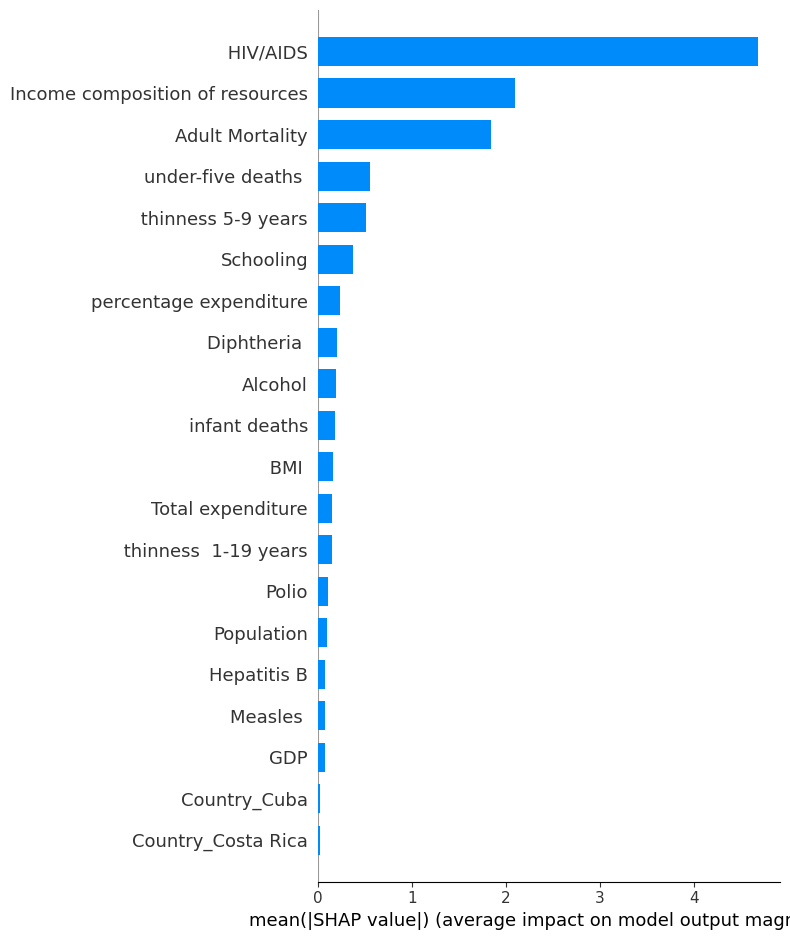

In [27]:
#SHAP value - Variable Importance
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.summary_plot(shap_values, X_trainr, plot_type="bar")

Terlihat bahwa garis biru yang terbentuk pada grafik semakin ke bawah semakin pendek artinya semakin pendek garis yang dihasilkan, maka semakin kecil pengaruh
variabel tersebut dalam memberikan pengaruh pada model. Sehingga dapat dikatakan bahwa variabel HIV/AIDS merupakan variabel yang memberikan pengaruh paling signifikan atau besar pada model. Kemudian disusul dengan variabel Income composition of resources, Adult Mortality,  dan beberapa variabel lainnya.


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [29]:
np.random.seed(123)

In [30]:
rf2=RandomForestRegressor(max_features=226//3)
rf2.fit(X_trainr,Y_trainr)

RandomForestRegressor(max_features=75)

In [31]:
Y_pred=rf2.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 3.203856737040027
MAE: 1.134979256502238


Diperoleh nilai MSE sebesar 3,2 dan nilai MAE sebesar 1,1 sehingga dapat dikatakan bahwa performa model regresi menggunakan algoritma random forest pada dataset cukup baik.

In [32]:
params={'n_estimators':(100, 200, 400),'max_features':('auto',226//3)}
rf2a=RandomForestRegressor()
gs=GridSearchCV(rf2a,params)
gs.fit(X_trainr,Y_trainr)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ('auto', 75),
                         'n_estimators': (100, 200, 400)})

In [33]:
gs.cv_results_

{'mean_fit_time': array([ 3.41166592,  5.77383828, 11.73708549,  1.16891303,  2.48138714,
         5.59526539]),
 'std_fit_time': array([0.63548299, 0.29746122, 0.18066913, 0.03244708, 0.37964884,
        0.67555763]),
 'mean_score_time': array([0.02193747, 0.03500032, 0.0591033 , 0.02057023, 0.03300138,
        0.06873026]),
 'std_score_time': array([0.0071626 , 0.00402612, 0.00329819, 0.00510831, 0.00323564,
        0.01231141]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 75, 75, 75],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 400, 100, 200, 400],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 100},
  {'max_features': 'auto', 'n_estimators': 200},
  {'max_features': 'auto', 'n_estimators': 400},
  {'max_features': 75, 'n

In [34]:
gs.best_estimator_

RandomForestRegressor(max_features=75, n_estimators=200)

Dilakukan pencarian performa model terbaik dengan mencari susunan hyperparameter model dengan diberikan ruang pencarian hyperparameter tertentu. Diperoleh nilai pencarian performa model terbaik dengan nilai max_features sebesar 75 dan nilai n_estimators sebesar 200. Selanjutnya dilakukan pengujian apakah performa model regresi menggunakan susunan hyperparameter dengan metode gridsearch tersebut benar-benar baik untuk digunakan atau tidak.

In [35]:
rf2b=RandomForestRegressor(max_features=75, n_estimators=200)
rf2b.fit(X_trainr,Y_trainr)

RandomForestRegressor(max_features=75, n_estimators=200)

In [36]:
Y_pred=rf2b.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 3.2340057818413537
MAE: 1.124003232144405


diperoleh nilai MSE sebesar 3,2 dan nilai MAE sebesar 1,1 sehingga dapat dikatakan bahwa performa model regresi dengan susunan hyperparameter dengan metode grid search pada dataset cukup baik.

# Kesimpulan

Berdasarkan analisis regresi yang telah dilakukan didapatkan bahwa model pada random forest (susunan hyperparameter dengan metode grid search) merupakan model yang paling baik digunakan untuk dataset ini karena memiliki nilai MSE dan MAE lebih kecil.